# 01 Finite Different Method

Dari expansi Taylor berikut,
\begin{equation}
u_{i+1}=u_i+\left.\frac{du}{dx}\right|_{x_i}dx
\end{equation}
akan diperoleh formula forward difference,
\begin{equation}
\left.\frac{du}{dx}\right|_{x_i}=\frac{u_{i+1}-u_i}{dx}
\end{equation}

Dari ekspansi Taylor berikut,
\begin{equation}
u_{i-1}=u_i-\left.\frac{du}{dx}\right|_{x_i}dx
\end{equation}
akan diperoleh formula backward difference,
\begin{equation}
\left.\frac{du}{dx}\right|_{x_i}=\frac{u_{i}-u_{i-1}}{dx}
\end{equation}

Dari ekspansi Taylor,
\begin{equation}
u_{i+1}=u_i+\left.\frac{du}{dx}\right|_{x_i}dx+\left.\frac{d^2u}{dx^2}\right|_{x_i}dx^2
\end{equation}
dan
\begin{equation}
u_{i-1}=u_i-\left.\frac{du}{dx}\right|_{x_i}dx+\left.\frac{d^2u}{dx^2}\right|_{x_i}dx^2
\end{equation}
akan diperoleh,
\begin{equation}
\left.\frac{du}{dx}\right|_{x_i}=\frac{u_{i+1}-u_{i-1}}{2dx}
\end{equation}
dan
\begin{equation}
\left.\frac{d^2u}{dx^2}\right|_{x_i}=\frac{u_{i+1}-2u_i+u_{i-1}}{dx^2}
\end{equation}

Persamaan-persamaan di atas dapat digunakan untuk menyelesaikan persamaan diferensial baik ordinary maupun partial, baik orde-1 maupun orde-2.

#### Contoh 1 : 

Hitunglah solusi numerik dari,
\begin{equation}
\frac{d^2u}{dx^2}=1
\end{equation}
dengan Boundary Conditions,
\begin{equation}
\left.\frac{du}{dx}\right|_{x_0}=1
\end{equation}
dan
\begin{equation}
u_0=1
\end{equation}
pada interval x=0 sd x=1 dan interval dx=0.1
#### Langkah penyelesaian
#### 1 Ubah BC pertama ke dalam bentuk diskrit menggunakan persamaan pada bagian 01.
\begin{equation}
\left.\frac{du}{dx}\right|_{x_0}=\frac{u_{1}-u_0}{dx}=1
\end{equation}
atau,
\begin{equation}
u_1=1\cdot dx+u_0=0.1+1=1.1
\end{equation}

#### 2 Ubah persamaan yang mau dihitung ke dalam bentuk diskrit menggunakan persamaan pada bagian 01.

\begin{equation}
\frac{d^2u}{dx^2}=\left.\frac{d^2u}{dx^2}\right|_{x_i}=\frac{u_{i+1}-2u_i+u_{i-1}}{dx^2}=1
\end{equation}
atau,
\begin{equation}
u_{i+1}=dx^2+2u_i-u_{i-1}
\end{equation}

#### 3 hitung nilai u pada posisi x=0.2 dst sd x=1. 
Gunakan persamaan terakhir di tulis di atas, dengan i=1 sd i=9. 

#### 4 perhatikan contoh python code untuk implementasi algoritma di atas

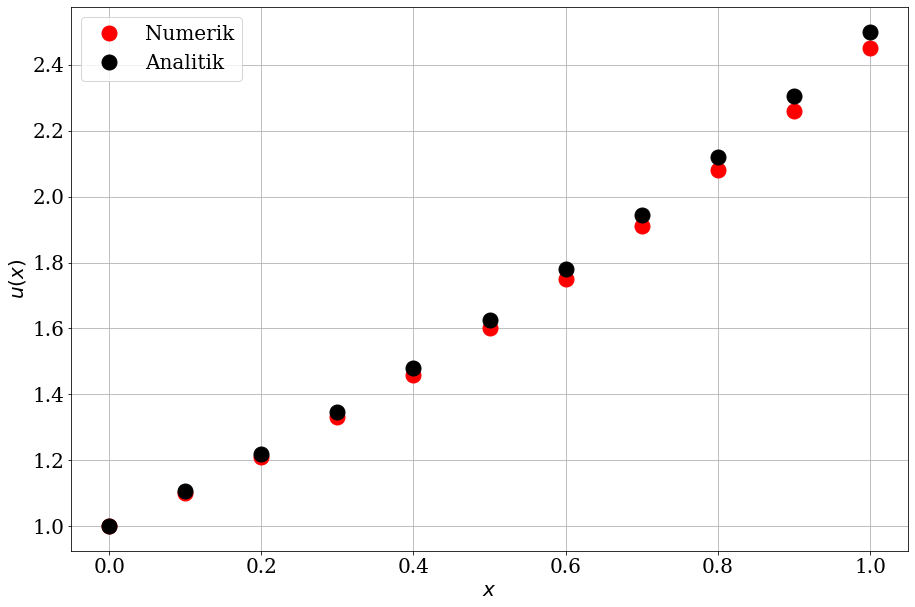

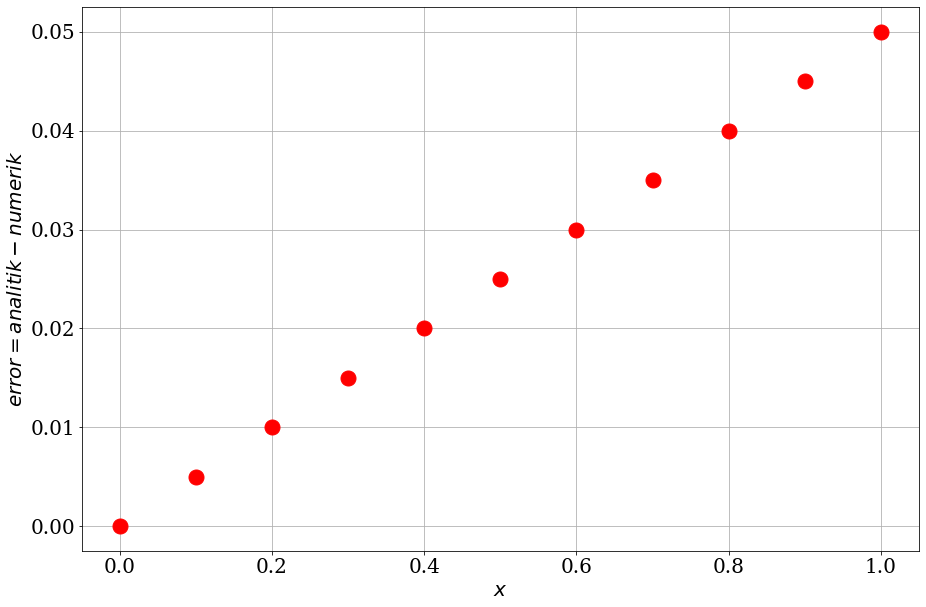

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 20})

x1=0
x2=1
dx=0.1
nx=int((x2-x1)/dx)+1
xx=np.arange(x1,x2+dx,dx)
uu=np.zeros(nx)

#Boundary conditions
uu[0]=1
uu[1]=1.1

for ii in range(1,nx-1):
    uu[ii+1]=dx**2 + 2*uu[ii]-uu[ii-1]
    
#Analitic
xa=0.5*xx**2 + xx +1

fig,ax=plt.subplots(figsize=(15,10))
ax.plot(xx,uu,"ro",markersize=15,label="Numerik")
ax.plot(xx,xa,"ko",markersize=15,label="Analitik")
plt.xlabel(r"$x$")
plt.ylabel(r"$u(x)$")
plt.grid()
ax.legend(loc='upper left')
plt.savefig("PDE_elliptic1.png", bbox_inches='tight')

fig,ax=plt.subplots(figsize=(15,10))
ee=xa-uu
ax.plot(xx,ee,"ro",markersize=15,label="error")
plt.xlabel(r"$x$")
plt.ylabel(r"$error=analitik-numerik$")
plt.grid()
plt.savefig("PDE_elliptik2.png",bbox_inches='tight')

#### Contoh 2 : 
Batang logam dengan panjang 10 meter, suhunya dibuat konstan pada kedua ujungnya yaitu 40C (kiri) dan 200C(kanan). Jika distribusi suhu (T) pada logam mengikuti persamaan berikut,

\begin{equation}
\frac{d^2T}{dx^2}+h(T_a-T)=0
\end{equation}
h adalah konstanta bernilai 0.01 dan Ta yang merupakan suhu lingkungan dimana logam ini berada dibuat Ta=20. Tentukan interval dari nilai T diskrit yang mau dihitung; misalkan dx=1.

Pada kasus ini, nilai T baru akan dapat dihitung setelah dibuat dalam bentuk sistem persamaan linier. Lihat pembahasan pada diktat kuliah. Berikut contoh python code nya:

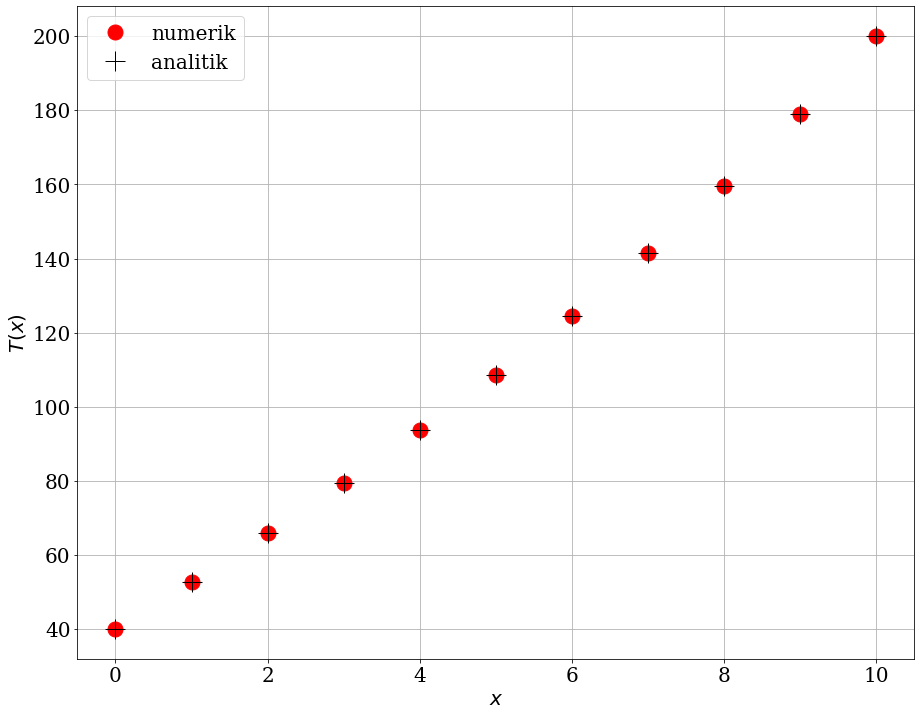

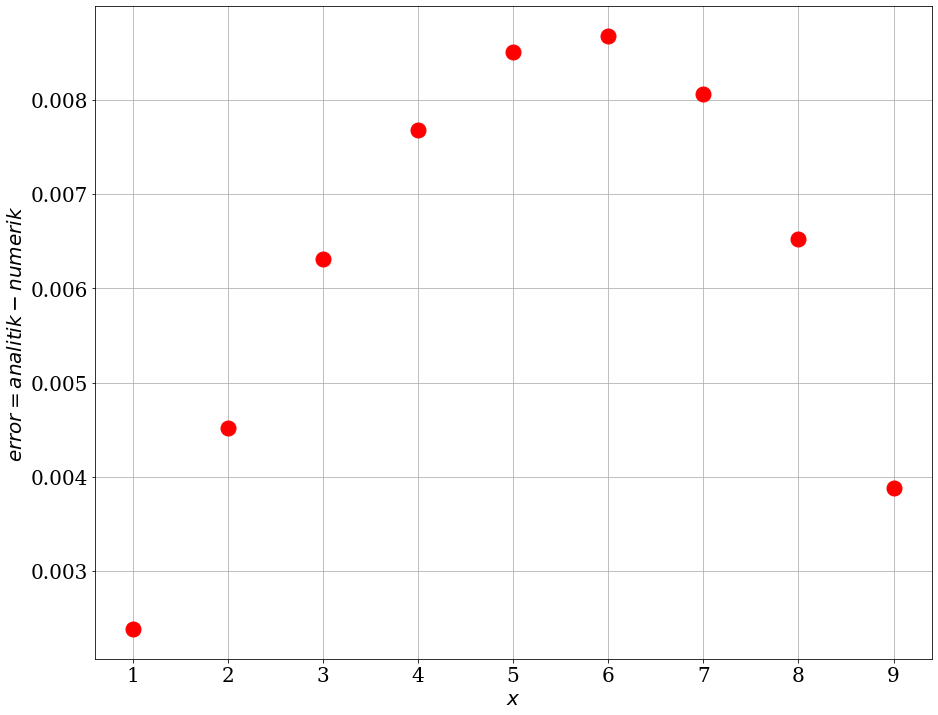

In [4]:
#solution
x1=0
x2=10
dx=1
xx=np.arange(x1,x2+dx,dx)
nx=int((x2-x1)/dx)
h=0.01

#boundary condition
t1=40
t2=200
ta=20
vec0=h*dx**2*ta
vec=np.zeros(nx-1)-vec0
#Boundary conditions
vec[0] -= t1
vec[nx-2] -= t2

mat=np.zeros((nx-1,nx-1))
diag=2+h*dx**2
#diagonal
for ii in range(0,nx-1):
    mat[ii][ii]=-diag

#upper
for ii in range(0,nx-2):
    mat[ii][ii+1]=1

#lower
for ii in range(1,nx-1):
    mat[ii][ii-1]=1


#temp distribution T1,T2,... T9
tt=np.dot(np.linalg.inv(mat),vec)

fig,ax=plt.subplots(figsize=(15,12))
ax.plot(xx[1:nx],tt,"ro",markersize=15,label="numerik")
ax.plot(xx[0],t1,"ro",markersize=15)
ax.plot(xx[nx],t2,"ro",markersize=15)


#analitycal solution
tana=73.4523*np.exp(0.1*xx) - 53.4523*np.exp(-0.1*xx) + 20
ax.plot(xx,tana,"k+",markersize=20,label="analitik")
ax.legend(loc='upper left')
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$T(x)$")
plt.savefig("PDE_elliptic3.png", bbox_inches='tight')

#error
ee=tt-tana[1:10]
fig,ax=plt.subplots(figsize=(15,12))
ax.plot(xx[1:nx],ee,"ro",markersize=15,label="error")
plt.xlabel(r"$x$")
plt.ylabel(r"$error=analitik-numerik$")
plt.grid()
plt.savefig("PDE_elliptic4.png",bbox_inches='tight')

# Latihan-1

A steady state heat balance for a rod can be represented as 
\begin{equation}
\frac{d^2T}{dx^2}-0.15T=0
\end{equation}
obtain numerical solution with T(0)=240 and T(10)=150!

# Latihan-2

Use finite differences to solve the boundary-value ordinary differential equation
\begin{equation}
\frac{d^2u}{dx^2}+6\frac{du}{dx}-u=2
\end{equation}
with boundary conditions u(0)=10 and u(2)=1. Plot the results of u versus x. Use dx=0.1

In [62]:
np.exp(1)

2.718281828459045